CAR DEKHO

About Car Dekho
CarDekho, founded in 2008 by Amit Jain and Anurag Jain, is India's leading automotive platform for buying and selling new and used cars. It offers car reviews, comparisons, prices, expert advice, and innovative tools like 360-degree views. CarDekho also partners with dealers, financial institutions, and insurance providers to enhance the car ownership experience. It has expanded operations to Southeast Asia and the UAE and is valued at over $1 billion.

Problem Statement:
The used car market in India is a dynamic and ever-changing landscape. Prices can fluctuate wildly based on a variety of factors including the make and model of the car, its mileage, its condition and the current market conditions. As a result, it can be difficult for sellers to accurately price their cars

Approach:
We propose to develop a machine learning model that can predict the price of a used car based on its features. The model will be trained on a dataset of used cars that have been sold on Cardekho.com in India. The model will then be able to be used to predict the price of any used car, given its features.

Objective
To predict Car Price using Machine Learning Model.

Benefits:
The benefits of this solution include:

    Sellers will be able to more accurately price their cars which will help them to sell their cars faster and for a higher price.
    Buyers will be able to find cars that are priced more competitively.
    The overall used car market in India will become more efficient.


In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#Load the dataset
data = "Cardekho.csv"
df =pd.read_csv(data)
# Check the first few rows of the dataset
df.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [4]:
df.columns

Index(['Unnamed: 0', 'car_name', 'brand', 'model', 'vehicle_age', 'km_driven',
       'seller_type', 'fuel_type', 'transmission_type', 'mileage', 'engine',
       'max_power', 'seats', 'selling_price'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


In [7]:
# Check the shape of the data (rows and columns)
df.shape

(15411, 14)

In [8]:
# Data cleaning: Drop unwanted columns
df.drop(columns=['Unnamed: 0'], inplace=True)

In [9]:
#Checking null values
df.isnull().sum()

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [10]:
# Checking Duplicate values
df.duplicated().sum()

np.int64(167)

In [11]:
# Statistical summary of numerical columns
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


Exploratory Data Analysis (EDA)
Univariate Analysis (Examining individual variables)
Univariate analysis involves looking at the distribution of individual features. This helps in understanding if any outliers are present and the overall distribution of the data.

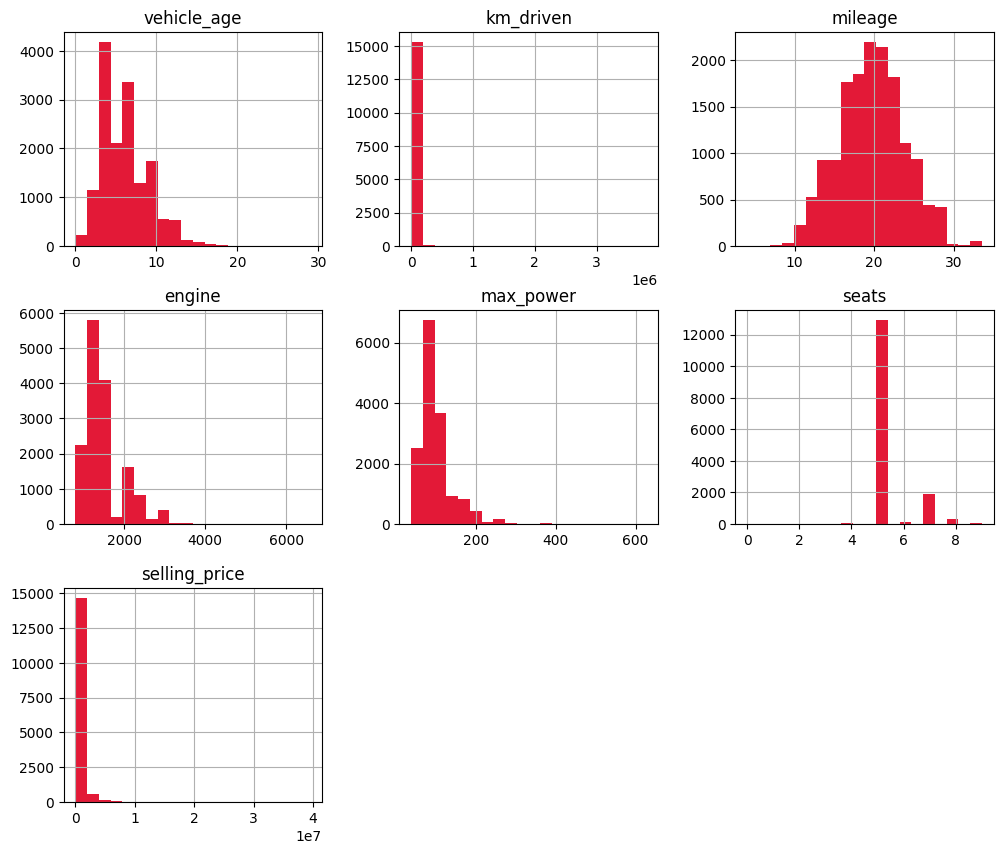

In [33]:
# Plot histograms for numerical features
df.hist(figsize=(12, 10), bins=20, color='#E31937')
plt.show()

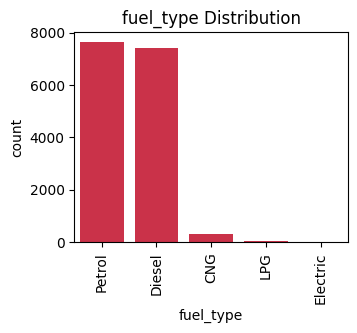

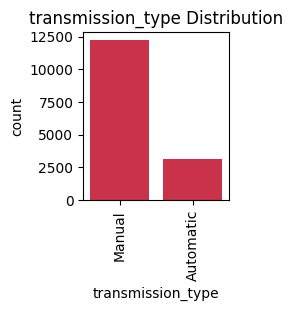

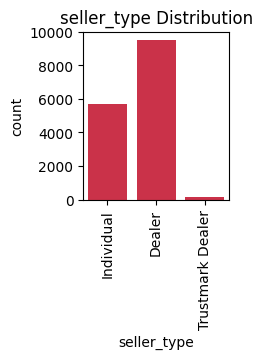

In [36]:
# Categorical features
categorical_features = ["fuel_type", "transmission_type", "seller_type"]
palette = "#E31937"
plt.figure(figsize=(12, 6))

# Loop through each categorical feature and plot the count plot
for i, feature in enumerate(categorical_features): 
    plt.subplot(2, 3, i+1) 
    sns.countplot(x=feature, data=df, color ='#E31937') 
    plt.title(f'{feature} Distribution') 
    plt.xticks(rotation = 90) 
    plt.show()

Bivariate Analysis (Examining the relationship between two variables)
We examine the relationship between the target variable (selling_price) and other features. This step typically helps in understanding which features have strong correlations with the target variable.

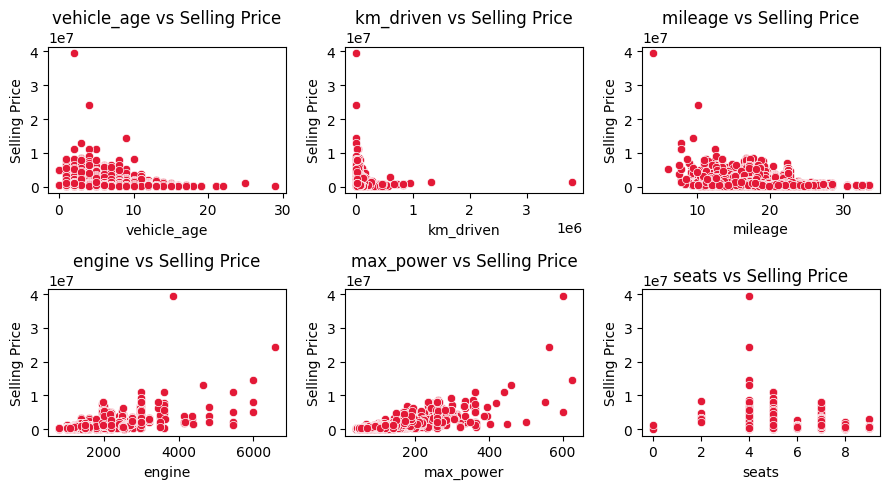

In [37]:
# Numerical features
numerical_features = ['vehicle_age', 
                      'km_driven', 
                      'mileage', 
                      'engine',
                      'max_power', 
                      'seats']

# Create subplots for scatter plots
plt.figure(figsize=(9,5))

# Scatter plot for each numerical feature vs selling price
for i, feature in enumerate(numerical_features): 
    plt.subplot(2, 3, i+1) 
    sns.scatterplot(x=df[feature], y=df['selling_price'], color='#E31937'')
    plt.title(f'{feature} vs Selling Price') 
    plt.xlabel(feature) 
    plt.ylabel('Selling Price')

plt.tight_layout()
plt.show()

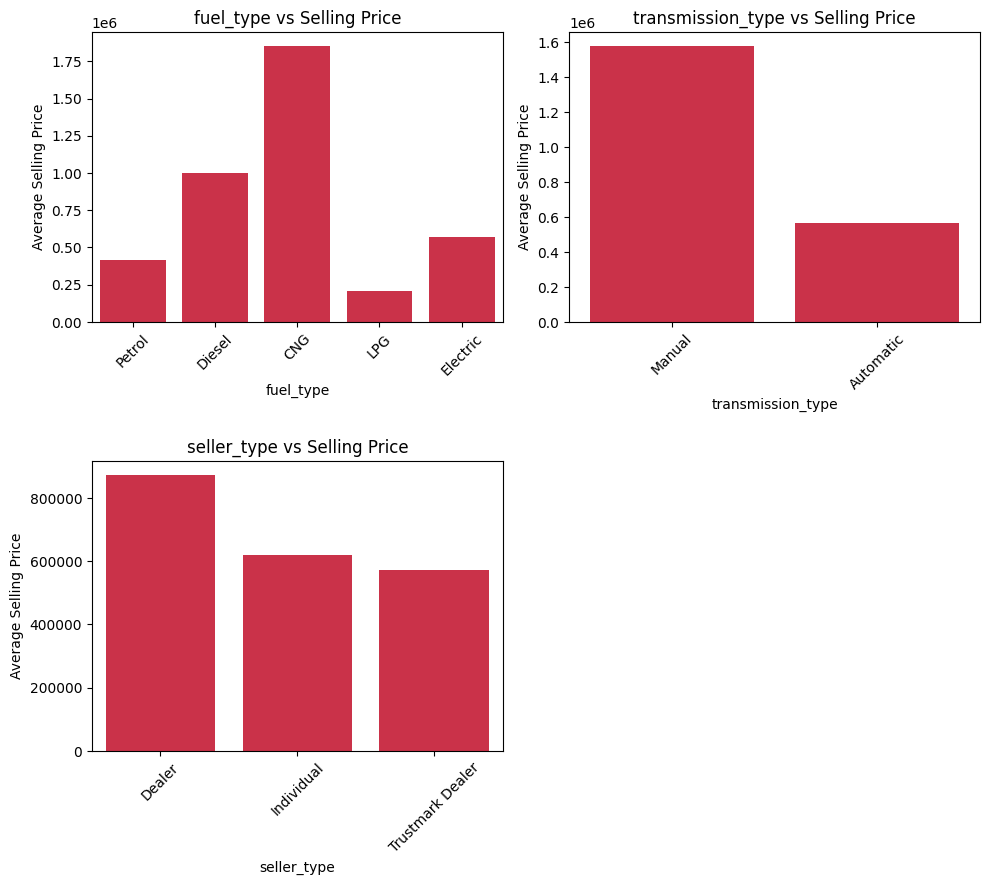

In [46]:
# Categorical features to analyze
categorical_features = ['fuel_type', 'transmission_type', 'seller_type']

# Set figure size for the plots
plt.figure(figsize=(10,12))

# Create subplots for bar plots of categorical features vs selling price
for i, feature in enumerate(categorical_features): 
    plt.subplot(3,2, i +1)
    sns.barplot(x=df[feature].value_counts().index, y=df.groupby(feature)['selling_price'].mean().values,hue=df[feature].value_counts().index,
        palette=['#E31937'] * len(df[feature].unique()),
        legend=False )
    plt.title(f'{feature} vs Selling Price') 
    plt.xlabel(feature) 
    plt.ylabel('Average Selling Price') 
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Multivariate Analysis (Correlation between multiple variables)

In [19]:
# List of numerical features you want to calculate correlation for
numerical_features = ['vehicle_age', 
                      'km_driven', 
                      'mileage', 
                      'engine',
                      'max_power', 
                      'seats', 
                      'selling_price']

# Calculate the correlation matrix for selected numerical features
correlation_matrix = df[numerical_features].corr()

# Display the correlation matrix
print(correlation_matrix)

               vehicle_age  km_driven   mileage    engine  max_power  \
vehicle_age       1.000000   0.333891 -0.257394  0.098965   0.005208   
km_driven         0.333891   1.000000 -0.105239  0.192885   0.044421   
mileage          -0.257394  -0.105239  1.000000 -0.632987  -0.533128   
engine            0.098965   0.192885 -0.632987  1.000000   0.807368   
max_power         0.005208   0.044421 -0.533128  0.807368   1.000000   
seats             0.030791   0.192830 -0.440280  0.551236   0.172257   
selling_price    -0.241851  -0.080030 -0.305549  0.585844   0.750236   

                  seats  selling_price  
vehicle_age    0.030791      -0.241851  
km_driven      0.192830      -0.080030  
mileage       -0.440280      -0.305549  
engine         0.551236       0.585844  
max_power      0.172257       0.750236  
seats          1.000000       0.115033  
selling_price  0.115033       1.000000  


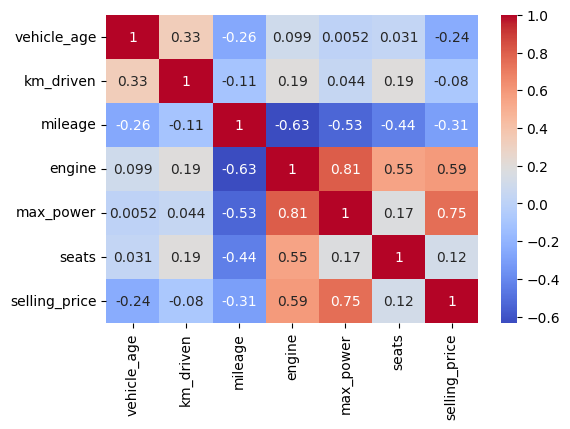

In [20]:
#Plot the heatmap for checking the correlation
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Summary of Correlation Insights:
1. Vehicle Age vs. Selling Price:
    Negative correlation (-0.24): Older cars usually have lower prices.
2. Kilometers Driven vs. Selling Price:–
    Weak negative correlation (-0.08): Minor effect on selling price.
3. Mileage vs. Selling Price:–
    Moderate negative correlation (-0.31): Low-mileage cars tend to have higher prices.
4. Engine Capacity vs. Selling Price:
    Moderate positive correlation (0.59): Larger engines often lead to higher prices.
5. Max Power vs. Selling Price:
    Strong positive correlation (0.75): Higher max power correlates with higher prices.
6. Seats vs. Selling Price:
    Weak positive correlation (0.12): Minor effect on price.
Other Key Insights:
• Mileage & Engine Capacity: Strong negative correlation (-0.63).
• Mileage & Max Power: Moderate negative correlation (-0.53).
Conclusion:
• Max Power is the strongest predictor of selling price.
• Vehicle age, mileage, and km driven have expected negative correlations with selling price.

Data Preprocessing
After the EDA, we need to:
• Drop irrelevant columns that won't help in predicting the target variable.
• Encode categorical variables (e.g., fuel_type, transmission_type) into numerical representations.
• Split the data into training and testing sets.

In [21]:
model_data = df.copy()
model_data.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [22]:
# Drop irrelevant columns
model_data.drop(labels = ['car_name','brand','model','seller_type'],axis = 1, inplace = True)

model_data = pd.get_dummies(model_data,dtype = float)
model_data

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,9,120000,19.70,796,46.30,5,120000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,5,20000,18.90,1197,82.00,5,550000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,11,60000,17.00,1197,80.00,5,215000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,9,37000,20.92,998,67.10,5,226000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,6,30000,22.77,1498,98.59,5,570000,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,9,10723,19.81,1086,68.05,5,250000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15407,2,18000,17.50,1373,91.10,7,925000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15408,6,67000,21.14,1498,103.52,5,425000,0.0,1.0,0.0,0.0,0.0,0.0,1.0
15409,5,3800000,16.00,2179,140.00,7,1225000,0.0,1.0,0.0,0.0,0.0,0.0,1.0


Understanding Features (X) and Target (y)
In any supervised learning task, the dataset consists of two main components:
• Features (X): These are the input variables that are used to predict the target. In the case of predicting house prices, features are the characteristics of the house such as:
    –Number of bedrooms
    –Square footage of the living area
    –Lot size
    –Age of the house
    –Location (like postal code, latitude, longitude, etc.)
• Target (y): This is the output or the variable you want to predict. In your case, the target is the Price of the house.

Why Split the Dataset?
• In supervised learning, we use the features (X) to make predictions about the target (y). The features contain the information that will help the    machine learning model learn the relationship with the target.
• We separate these two components so that the model can learn the mapping from X (inputs) to y (output). Here's why we do it:
    –X (Features): These are the predictors (independent variables), which will help the model learn patterns or relationships that influence the
    target variable (Price). These features will be fed into the model to predict the price.
    –y (Target): This is the variable we want to predict. The machine learning model will try to map the inputs (X) to the correct output (y).

In [23]:
# Define features (X) and target (Y)
X = model_data.drop('selling_price', axis=1) # Independent variables
Y = model_data['selling_price'] # Target variable

Splitting the Data into Training and Test Sets

It’s important to separate the data into training and testing sets to evaluate the performance of the model.

In [25]:
# Split data into training (80%) and testing (20%) sets
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2)
print(f"Training set size: {train_X.shape}, Testing set size: {test_X.shape}")
X = model_data.drop('selling_price', axis = 1)

Training set size: (12328, 13), Testing set size: (3083, 13)


Train the Regression Model

In [26]:
# Initialize the Linear Regression model
regressor = LinearRegression()

# Train the model on the training data
regressor.fit(train_X, train_Y)

# Predict on the test data
predictions = regressor.predict(test_X)

# Show the first few predicted values
print(predictions[:5])

[ 265513.72500889  372966.80872877 1548900.5251799   882621.99455015
  211913.44726603]


In [28]:
test_X['predicted_sales_price'] = predictions
test_X['Actual_price'] = test_Y
test_X['difference'] = test_X['predicted_sales_price'] - test_X['Actual_price']
test_X

,vehicle_age,km_driven,mileage,engine,max_power,seats,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual,predicted_sales_price,Actual_price,difference
4945,6,110000,24.00,1120,70.00,5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.655137e+05,380000,-1.144863e+05
3548,8,40000,19.10,1197,85.80,5,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.729668e+05,400000,-2.703319e+04
15392,5,128000,12.63,2179,147.50,5,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.548901e+06,2675000,-1.126099e+06
8825,5,100000,27.30,1498,98.60,5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,8.826220e+05,500000,3.826220e+05
3702,8,49000,22.07,1199,73.90,5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.119134e+05,380000,-1.680866e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14519,6,76300,17.92,1086,62.10,5,0.0,0.0,0.0,0.0,1.0,0.0,1.0,8.177383e+04,349000,-2.672262e+05
12938,4,56100,24.00,1396,88.76,5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,7.525511e+05,750000,2.551148e+03
13605,9,52865,23.95,998,67.05,5,0.0,0.0,0.0,0.0,1.0,0.0,1.0,7.368824e+04,245000,-1.713118e+05
7882,8,67000,19.01,1461,108.45,5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,7.078314e+05,425000,2.828314e+05


Model Evaluation
1. Mean Squared Error (MSE)
What is MSE?
MSE measures the average squared differences between the predicted and actual values. It quantifies how far off your model's predictions are, penalizing larger errors more heavily due to squaring.
Why Use MSE?
• Penalizes Larger Errors: Squaring the error ensures that large deviations get penalized more.
• Simple and Effective: It provides a clear metric for model evaluation, with lower values indicating better performance.
Formula:
        MSE=1nΣi=1n(yi−^yi)2
Where:
    • ( y_i ): True value
    •( \hat{y}_i ): Predicted value
    •( n ): Number of observations
Interpretation:
• Low MSE: Indicates predictions are close to actual values.
• High MSE: Indicates poor prediction accuracy.
• Unit: The unit of MSE is the square of the target variable's unit, making it less interpretable than RMSE.

2. Root Mean Squared Error (RMSE)
What is RMSE?
RMSE is the square root of MSE. It expresses the error in the same units as the target variable, making it more interpretable than MSE.
Why Use RMSE?
• Intuitive: Errors are presented in the same units as the target variable.
• Magnitude of Error: Gives a clear idea of the typical prediction error.

Interpretation:
• Lower RMSE: Better prediction accuracy.
• Higher RMSE: Indicates larger errors.
• Unit: Same as the target variable.
Why RMSE over MSE?
• While MSE tells you the average squared error, RMSE provides an error measure that’s easier to interpret in the context of the problem (e.g., INR for car prices).

3. R-squared (R²)
What is R-squared?
R-squared measures the proportion of variance in the target variable that’s explained by the features in the model. It’s a relative metric and ranges from 0 to 1 (or negative if the model is worse than a baseline).
Why Use R-squared?
• Explains Variance: Shows how well the independent variables explain the variability of the dependent variable.
• Model Fit: A higher R² indicates a better fit.

Where:
• ( y_i ): True value
• ( \hat{y}_i ): Predicted value
• ( \bar{y} ): Mean of the actual values
Interpretation:
• R² = 1: Perfect fit; all variance is explained by the model.
• R² = 0: The model explains none of the variance (equivalent to predicting the mean).
• R² < 0: The model performs worse than the mean predictor.

Why Use All Three Metrics?
• MSE: Focuses on the absolute size of the error.
• RMSE: Scales this error to the same unit as the target variable for easier interpretation.
• R-squared: Provides insight into how well the model fits the data and explains variance.

In [29]:
# Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse = mean_squared_error(test_Y, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(test_Y,predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")

Mean Squared Error (MSE): 200402630681.08414
Root Mean Squared Error (RMSE): 447663.5239564244
R-squared: 0.6626887291142378


1. Mean Squared Error (MSE): 204,566,383,684.88
• MSE is a measure of how far your predictions are from the true values. In this case, the MSE is 204,566,383,684.88, which is quite large.
• Interpretation: The MSE value is hard to interpret directly, as it's in squared units (in this case, squared INR or the unit of the target variable). The larger the MSE, the worse the model is at making predictions.
• Why it matters: This gives an overall measure of how off the model's predictions are, but because it's squared, it overemphasizes larger errors.
2. Root Mean Squared Error (RMSE): 452,290.15
• RMSE is simply the square root of MSE, so it gives you a clearer idea of the magnitude of the prediction error.
• Interpretation: An RMSE of ₹452,290.15 means that, on average, the model’s predictions are off by ₹452,290.15 for each prediction. This is a more interpretable value because it’s in the same units as the target variable (car prices).
• Why it matters: Lower RMSE means the model's predictions are closer to the actual values, so the goal is to minimize this number as much as possible.
3. R-squared (R²): 0.6731 (or 67.31%)
• R-squared is a measure of how well the model explains the variability in the target variable. It shows the proportion of the variance in the target variable (selling price) that is explained by the model.
• Interpretation: An R² of 0.6731 means that 67.31% of the variance in car prices is explained by the model. This is a fairly decent result, indicating that the model explains a substantial amount of the variability, but there is still 32.69% of the variance that remains unexplained.
• Why it matters: A higher R² is generally better, but a "good" R² depends on the context. In some domains, an R² of 0.67 can be acceptable, especially when predicting something as variable as car prices.

Visualizing the Predictions

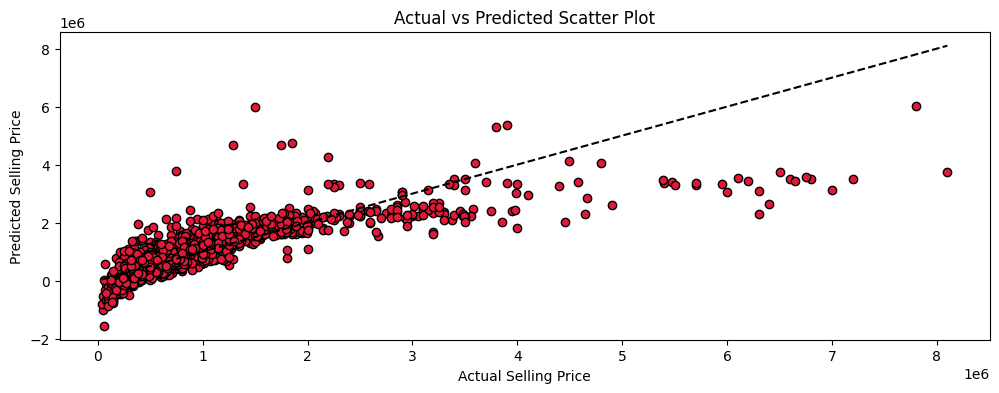

In [48]:
# Actual vs Predicted Scatter Plot
plt.figure(figsize=(12,4))
plt.scatter(test_Y, predictions, color='#E31937',edgecolor='black')
plt.plot([test_Y.min(), test_Y.max()], [test_Y.min(), test_Y.max()], color='black', linestyle='--') # Ideal line
plt.title('Actual vs Predicted Scatter Plot')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.show()

The red dashed line represents the ideal line (where predicted values exactly match actual values). The scatter points show how close your predictions are to the actual prices. The closer the points are to the red line, the better the model.

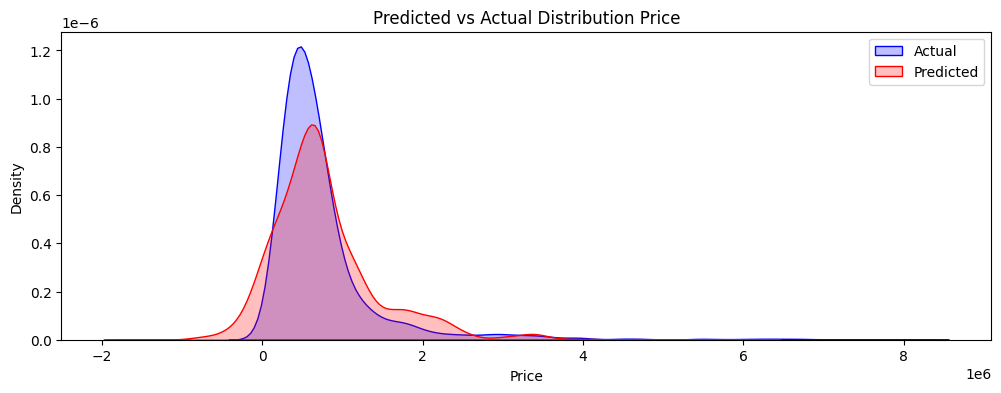

In [31]:
# Plotting Actual vs Predicted Distribution Price
plt.figure(figsize=(12,4))
sns.kdeplot(test_Y, color='blue', label='Actual', fill=True)
sns.kdeplot(predictions, color='red', label='Predicted', fill=True)
plt.title('Predicted vs Actual Distribution Price')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()
plt.show()

In a good model, the predicted price distribution should closely match the actual price distribution. Any significant difference suggests the model isn't capturing the distribution of prices well.